Regression Analysis Apprentice Chef Dataset
Valentin Voelckel

In [1]:
#importing packages
import pandas as pd # data science essentials
import seaborn as sns # essential graphical output
import matplotlib.pyplot as plt # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
df = pd.read_excel(file)
df.head()

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


 Exploration of Dataset

In [2]:
#Overview dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [3]:
# descriptive statistics for numeric data
df.describe(include = 'number').round(decimals=2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [4]:
# finding Skewness 

from scipy.stats import skew 
import numpy as np 
import pylab as p 


df.skew(axis = 0, skipna = True) 

REVENUE                        1.626573
CROSS_SELL_SUCCESS            -0.766572
TOTAL_MEALS_ORDERED            2.006653
UNIQUE_MEALS_PURCH             0.370833
CONTACTS_W_CUSTOMER_SERVICE    0.566015
PRODUCT_CATEGORIES_VIEWED      0.163797
AVG_TIME_PER_SITE_VISIT        9.639388
MOBILE_NUMBER                 -2.307384
CANCELLATIONS_BEFORE_NOON      1.601525
CANCELLATIONS_AFTER_NOON       2.760535
TASTES_AND_PREFERENCES        -0.949415
PC_LOGINS                     -0.038384
MOBILE_LOGINS                  0.052285
WEEKLY_PLAN                    1.538602
EARLY_DELIVERIES               1.603124
LATE_DELIVERIES                1.513355
PACKAGE_LOCKER                 0.606112
REFRIGERATED_LOCKER            2.445841
AVG_PREP_VID_TIME              1.200283
LARGEST_ORDER_SIZE             0.703995
MASTER_CLASSES_ATTENDED        0.657373
MEDIAN_MEAL_RATING            -0.253768
AVG_CLICKS_PER_VISIT          -0.113411
TOTAL_PHOTOS_VIEWED            2.514511
dtype: float64

In [5]:
#Count Outliers df
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

<ipython-input-5-9fc1020a20ab>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
<ipython-input-5-9fc1020a20ab>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


AVG_CLICKS_PER_VISIT             6
AVG_PREP_VID_TIME               57
AVG_TIME_PER_SITE_VISIT         87
CANCELLATIONS_AFTER_NOON       279
CANCELLATIONS_BEFORE_NOON       44
CONTACTS_W_CUSTOMER_SERVICE      3
CROSS_SELL_SUCCESS               0
EARLY_DELIVERIES                79
EMAIL                            0
FAMILY_NAME                      0
FIRST_NAME                       0
LARGEST_ORDER_SIZE              33
LATE_DELIVERIES                 96
MASTER_CLASSES_ATTENDED          6
MEDIAN_MEAL_RATING              13
MOBILE_LOGINS                    0
MOBILE_NUMBER                  238
NAME                             0
PACKAGE_LOCKER                   0
PC_LOGINS                        0
PRODUCT_CATEGORIES_VIEWED        0
REFRIGERATED_LOCKER            220
REVENUE                         82
TASTES_AND_PREFERENCES           0
TOTAL_MEALS_ORDERED            107
TOTAL_PHOTOS_VIEWED            120
UNIQUE_MEALS_PURCH               2
WEEKLY_PLAN                    237
dtype: int64

In [6]:
#cleaning the data
#Find null values & summing missing values per column
df.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [7]:
#Impute missing valuesfor family name
fill = "na"

#imputing 'FAMILY_NAME'
df['FAMILY_NAME'] = df['FAMILY_NAME'].fillna(fill)

#checking if values are still missing
df.isnull().any(axis=0).any(axis=0)


False

In [8]:
#labeling overview for categorization
continuous_ix = df.select_dtypes(include=['float64']).columns
numerical_ix = df.select_dtypes(include=['float64','int64']).columns
categorical_ix = df.select_dtypes(include=['object', 'bool']).columns

In [9]:
#continuous data
continuous_ix

Index(['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME'], dtype='object')

In [10]:
#numerical data
numerical_ix


Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [11]:
#categorical data
categorical_ix


Index(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], dtype='object')

#label data 
""""
Countinuous data: 
'REVENUE' 'TOTAL_MEALS_ORDERED' 'AVG_TIME_PER_SITE_VISIT'
'AVG_PREP_VID_TIME' 'TOTAL_PHOTOS_VIEWED','AVG_CLICKS_PER_VISIT'

Interval/Count data: 
'CROSS_SELL_SUCCESS', 'UNIQUE_MEALS_PURCH', 
'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'MOBILE_NUMBER', 
'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 
'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING'


Categorical data:
'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'"""

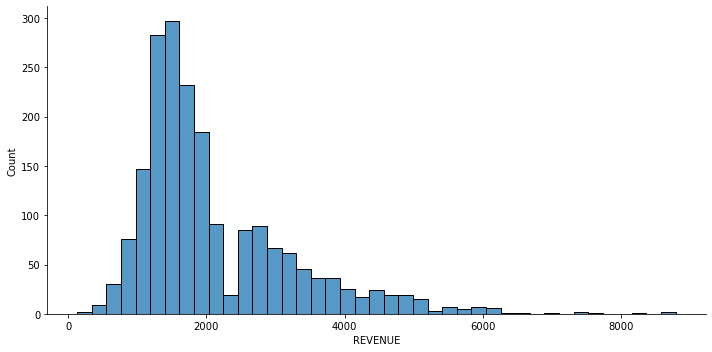

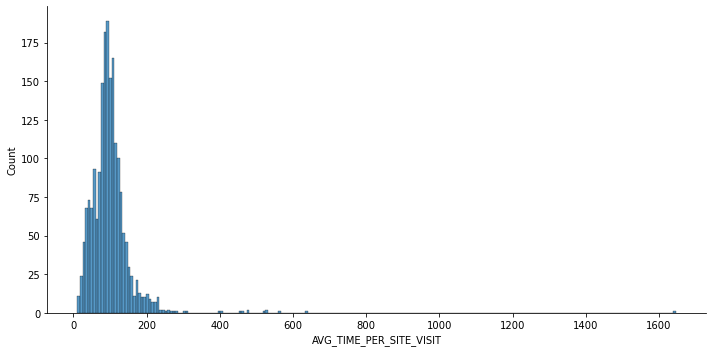

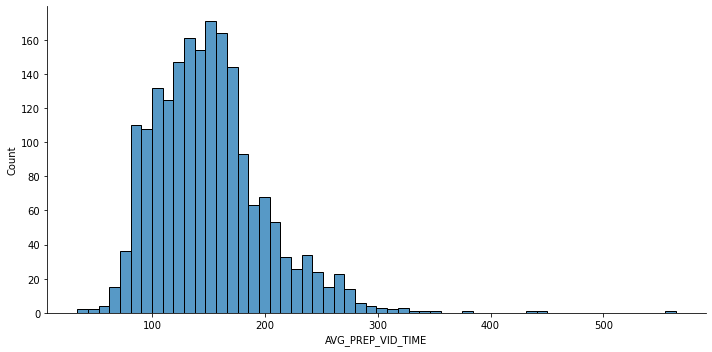

In [12]:
# developing a histogram with REVENUE as Y-variable 
#viewing the distribution
sns.displot(data    = df,
             x      = 'REVENUE',
             height = 5,
             aspect = 2)


# displaying the histogram
plt.show()

##########################
# developing a histogram of avg time per site visit 
#viewing the distribution 
sns.displot(data    = df,
             x      = 'AVG_TIME_PER_SITE_VISIT',
             height = 5,
             aspect = 2)


# displaying the histogram
plt.show()


##########################
# developing a histogram of avg prep vid time
#viewing the distribution 
sns.displot(data    = df,
             x      = 'AVG_PREP_VID_TIME',
             height = 5,
             aspect = 2)


# displaying the histogram
plt.show()



In [13]:
#conclusion: All contiuous variables are right skewed
#Choosing Revenue for further analysis, because variable is least skewed

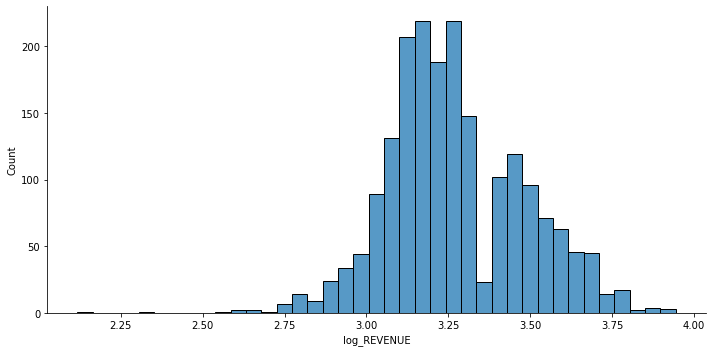

In [14]:
#log transforming Revenue and saving it to the dataset
df['log_REVENUE'] = np.log10(df['REVENUE'])

# histogram with log_REVENUE to compare 
sns.displot(data    = df,
             x      = 'log_REVENUE',
             height = 5,
             aspect = 2)


# displaying the histogram
plt.show()

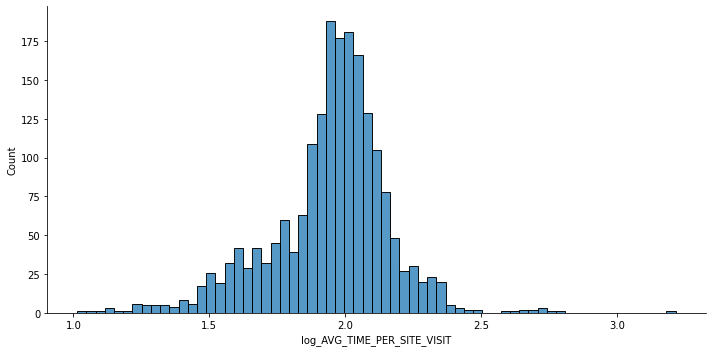

In [15]:
#log transforming Revenue and saving it to the dataset
df['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(df['AVG_TIME_PER_SITE_VISIT'])

# histogram with log_REVENUE to compare 
sns.displot(data    = df,
             x      = 'log_AVG_TIME_PER_SITE_VISIT',
             height = 5,
             aspect = 2)


# displaying the histogram
plt.show()

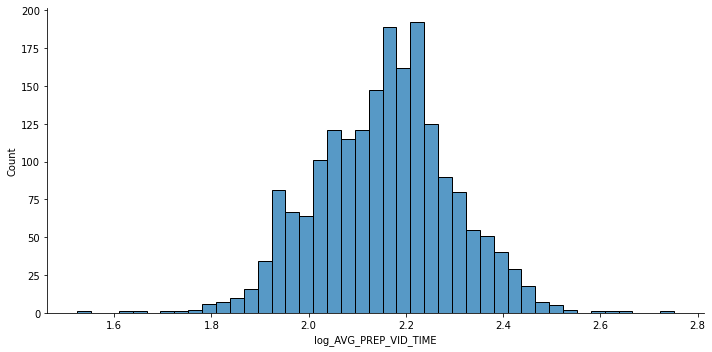

In [16]:
#log transforming  and saving it to the dataset
df['log_AVG_PREP_VID_TIME'] = np.log10(df['AVG_PREP_VID_TIME'])

# histogram with log to compare 
sns.displot(data    = df,
             x      = 'log_AVG_PREP_VID_TIME',
             height = 5,
             aspect = 2)


# displaying the histogram
plt.show()

Visualizing data

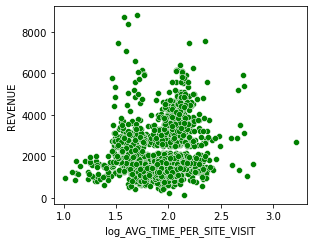

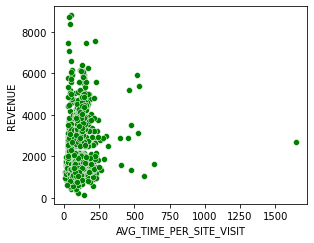

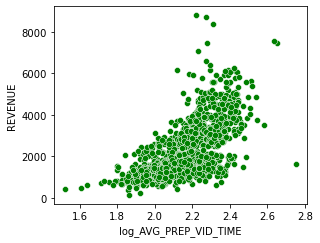

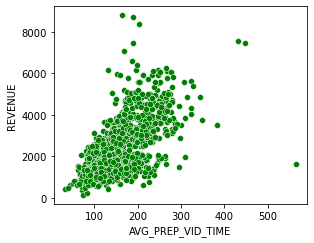

In [17]:
#Visualizing continous data

########################
# Visual EDA (Scatterplots)
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['log_AVG_TIME_PER_SITE_VISIT'],
                y = df['REVENUE'],
                color = 'g')
plt.xlabel('log_AVG_TIME_PER_SITE_VISIT')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['AVG_TIME_PER_SITE_VISIT'],
                y = df['REVENUE'],
                color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['log_AVG_PREP_VID_TIME'],
                y = df['REVENUE'],
                color = 'g')
plt.xlabel('log_AVG_PREP_VID_TIME')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['AVG_PREP_VID_TIME'],
                y = df['REVENUE'],
                color = 'g')
plt.xlabel('AVG_PREP_VID_TIME')
plt.show()


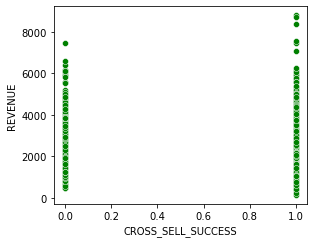

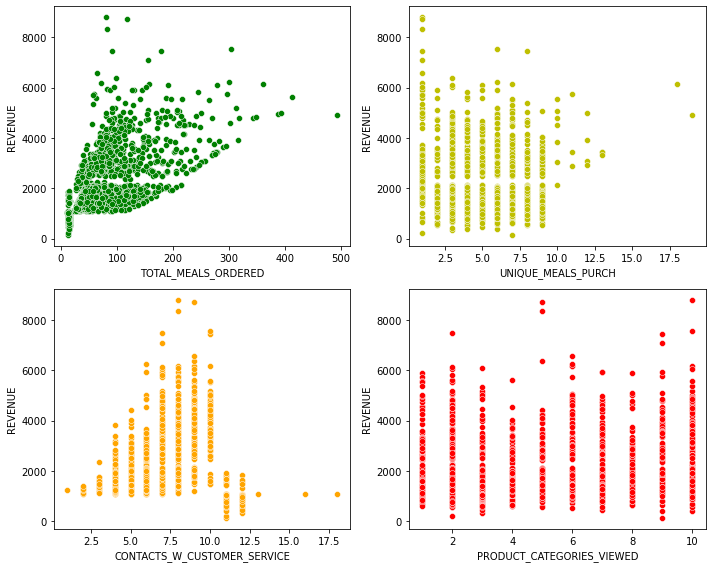

<ipython-input-18-e37cd7486e72>:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 2)
<ipython-input-18-e37cd7486e72>:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 2)
<ipython-input-18-e37cd7486e72>:74: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

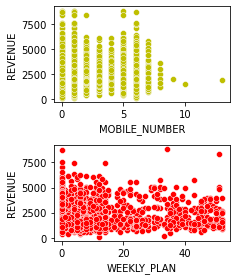

<ipython-input-18-e37cd7486e72>:121: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 2, 2)


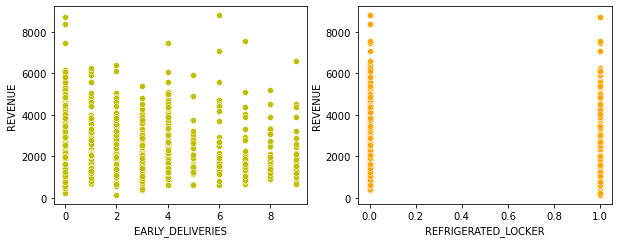

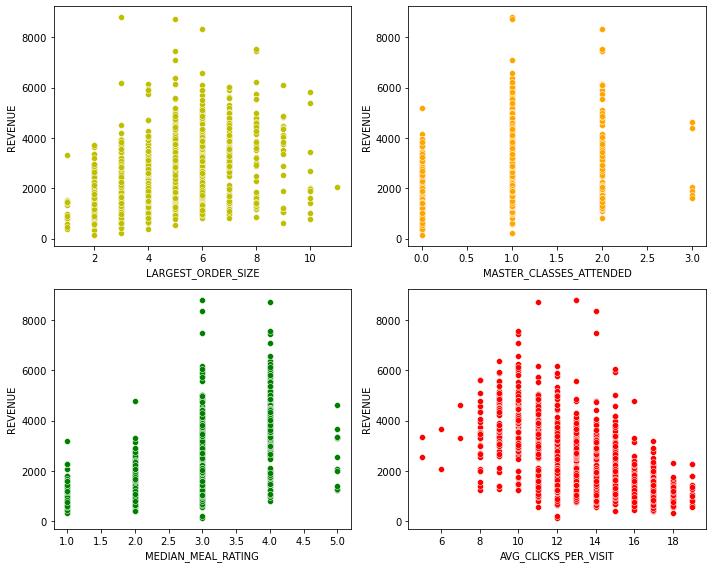

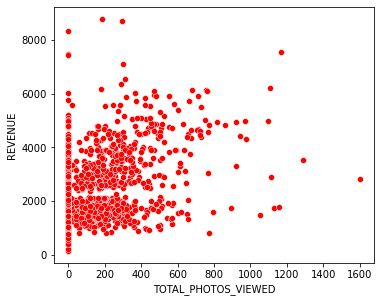

In [18]:
#Visualizing Interval data


########################
# Visual EDA (Scatterplots)
########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['CROSS_SELL_SUCCESS'],
                y = df['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['TOTAL_MEALS_ORDERED'],
                y = df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['UNIQUE_MEALS_PURCH'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = df['REVENUE'],
                color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = df['PRODUCT_CATEGORIES_VIEWED'],
                y = df['REVENUE'],
                color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['CANCELLATIONS_BEFORE_NOON'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['CANCELLATIONS_AFTER_NOON'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['TASTES_AND_PREFERENCES'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['PC_LOGINS'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('PC_LOGINS')


########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['MOBILE_NUMBER'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('MOBILE_NUMBER')


########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = df['WEEKLY_PLAN'],
                y = df['REVENUE'],
                color = 'r')
plt.xlabel('WEEKLY_PLAN')
plt.tight_layout()
plt.show()


########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['EARLY_DELIVERIES'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['PACKAGE_LOCKER'],
                y = df['REVENUE'],
                color = 'orange')
plt.xlabel('PACKAGE_LOCKER')


########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['REFRIGERATED_LOCKER'],
                y = df['REVENUE'],
                color = 'orange')
plt.xlabel('REFRIGERATED_LOCKER')


########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['LARGEST_ORDER_SIZE'],
                y = df['REVENUE'],
                color = 'y')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = df['MASTER_CLASSES_ATTENDED'],
                y = df['REVENUE'],
                color = 'orange')
plt.xlabel('MASTER_CLASSES_ATTENDED')

plt.subplot(2, 2, 3)
sns.scatterplot(x = df['MEDIAN_MEAL_RATING'],
                y = df['REVENUE'],
                color = 'g')
plt.xlabel('MEDIAN_MEAL_RATING')

plt.subplot(2, 2, 4)
sns.scatterplot(x = df['AVG_CLICKS_PER_VISIT'],
                y = df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

plt.tight_layout()
plt.show()

########################


fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = df['TOTAL_PHOTOS_VIEWED'],
                y = df['REVENUE'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

Feature engineering Categorical data

In [19]:

#counting variables to see if pattern exists
print(f"""
Name
------
{df['NAME'].value_counts()}


Email
----------
{df['EMAIL'].value_counts()}


First Name
-------------
{df['FIRST_NAME'].value_counts()}


Last Name
----------
{df['FAMILY_NAME'].value_counts()}

""")



Name
------
Black Bernarr           1
Hareth (Mole's Town)    1
Eustace Brune           1
Rosamund Lannister      1
Satin                   1
                       ..
Rickard Thorne          1
Bodger                  1
Kyleg                   1
Ronnel Harclay          1
Qarl Kenning            1
Name: NAME, Length: 1946, dtype: int64


Email
----------
grazdan@mcdonalds.com           1
allyria.dayne@amex.com          1
cleyton.caswell@gmail.com       1
azor.ahai@merck.com             1
chett@yahoo.com                 1
                               ..
marwyn@msn.com                  1
ferret@ibm.com                  1
helaena.targaryen@dupont.com    1
lymond.vikary@aol.com           1
meera.reed@gmail.com            1
Name: EMAIL, Length: 1946, dtype: int64


First Name
-------------
Jon        21
Jeyne      14
Aegon      12
Walder     10
Alyn       10
           ..
Lenwood     1
Edmyn       1
Talla       1
Lorcas      1
Paxter      1
Name: FIRST_NAME, Length: 1442, dtype: int64


L

In [20]:
#Engineering Email Based on Domain


#import libraries
import random as rand


#random seed
rand.seed(a=372)

# STEP 1: splitting emails at the @ sign

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '@'
    split_email = df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df



,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [21]:

# STEP 2:CONCATENATING DOMAINS AS A NEW COLUMN IN DF

# safety measure in case of multiple concatenations
df = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAINS']


# concatenating personal_email_domain with friends DataFrame
#adds the column to the dataset
df = pd.concat([df, email_df['EMAIL_DOMAINS']],
                   axis = 1)


# printing value counts of personal_email_domain
df.loc[: ,'EMAIL_DOMAINS'].value_counts()



gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
cocacola.com         28
mcdonalds.com        28
jnj.com              28
merck.com            28
apple.com            27
nike.com             27
ge.org               26
ibm.com              26
dupont.com           26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
exxon.com            24
travelers.com        24
boeing.com           23
caterpillar.com      22
mmm.com              22
pg.com               22
verizon.com          22
walmart.com          21
disney.com           21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAINS, dtype: int64

In [22]:

# STEP 3: splitting emails at the '.'

# dot holder list (emails with no dots)
dotholder_lst = []

# looping over each email address
for index, col in df.iterrows():
    
    # splitting email domain at '.'
    dot_email = df.loc[index, 'EMAIL_DOMAINS'].split(sep = '.')

    # appending dotholder_lst with the results
    dotholder_lst.append(dot_email)
    

# converting cleanemail_df into a DataFrame 
cleanemail_df = pd.DataFrame(dotholder_lst)


# displaying the results
cleanemail_df

,0,1
0,unitedhealth,com
1,ge,org
2,jnj,com
3,ge,org
4,jnj,com
...,...,...
1941,yahoo,com
1942,yahoo,com
1943,gmail,com
1944,yahoo,com


In [23]:

# STEP 4 :CONCATENATING CLEAN EMAIL DOMAINS AS A NEW COLUMN IN  DF

# safety measure in case of multiple concatenations
df = pd.read_excel(file)


# renaming column to concatenate
cleanemail_df.columns = ['CLEAN_MAIL' , '1']


# concatenating personal_email_domain with friends DataFrame
#adds the column to the dataset
df = pd.concat([df, cleanemail_df['CLEAN_MAIL']],
                   axis = 1)


# printing value counts of personal_email_domain
df.loc[: ,'CLEAN_MAIL'].value_counts()



gmail           303
protonmail      284
yahoo           274
msn              72
aol              69
passport         64
hotmail          63
live             62
me               59
amex             30
cocacola         28
merck            28
mcdonalds        28
jnj              28
apple            27
nike             27
ge               26
ibm              26
dupont           26
microsoft        25
chevron          25
unitedhealth     24
travelers        24
exxon            24
boeing           23
verizon          22
mmm              22
pg               22
caterpillar      22
walmart          21
disney           21
pfizer           20
visa             20
jpmorgan         19
goldmansacs      18
unitedtech       18
cisco            18
intel            17
homedepot        17
Name: CLEAN_MAIL, dtype: int64

In [24]:
# STEP 5: Aggregating personal and work emails

# email domain types
personal_email_domains = ['gmail','protonmail','yahoo','msn',
                          'aol','hotmail','live','me']

work_email_domains  = ['passport','amex','cocacola','jnj','merck',
                       'mcdonalds','nike','apple','dupont','ibm',
                       'ge','microsoft','chevron','travelers',
                       'exxon','unitedhealth','boeing','caterpillar',
                       'mmm','pg','verizon','walmart','disney',
                       'pfizer','visa','jpmorgan','unitedtech',
                       'cisco','goldmansacs','intel','homedepot']

# placeholder list
holder_lst = []


# looping to group observations by domain type
for domain in df['CLEAN_MAIL']:
    
        if domain in personal_email_domains:
            holder_lst.append('personal')
            
        elif domain in work_email_domains:
            holder_lst.append('work')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
df['DOMAIN_GROUP'] = pd.Series(holder_lst)



In [25]:
## Taking out personal and work emails into columns 
# one hot encoding domain groups
ONE_HOT_DOMAIN = pd.get_dummies(df['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
df = df.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
df = df.join([ONE_HOT_DOMAIN])

# saving new columns
new_columns = df.columns

Feature Engineering numeric data

In [26]:
#high amount of zeros total masterclass total photos
#subsetting to check value count for variables that appear to have large amount of zero values

total_crosssell_zeroes = len(df['CROSS_SELL_SUCCESS'][df['CROSS_SELL_SUCCESS']==0])
total_mobile_zeroes = len(df['MOBILE_NUMBER'][df['MOBILE_NUMBER']==0])
total_weeklyplan_zeroes = len(df['WEEKLY_PLAN'][df['WEEKLY_PLAN']==0])
total_earlydeliveries_zeroes = len(df['EARLY_DELIVERIES'][df['EARLY_DELIVERIES']==0])
totalrefrigerated = len(df['REFRIGERATED_LOCKER'][df['REFRIGERATED_LOCKER']==0])
total_masterclass_zeroes = len(df['MASTER_CLASSES_ATTENDED'][df['MASTER_CLASSES_ATTENDED']==0])
total_photos_zeroes =len(df['TOTAL_PHOTOS_VIEWED'][df['TOTAL_PHOTOS_VIEWED']==0])

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
Cross-Sell Success    | {total_crosssell_zeroes}\t\t{len(df) - total_crosssell_zeroes}
Mobile number         | {total_mobile_zeroes}\t\t{len(df) - total_mobile_zeroes}
Weekly plans          | {total_weeklyplan_zeroes}\t\t{len(df) - total_weeklyplan_zeroes}
Early deliveries      | {total_earlydeliveries_zeroes}\t\t{len(df) - total_earlydeliveries_zeroes}
Refridgerated         | {totalrefrigerated}\t\t{len(df) - totalrefrigerated}
Masterclasses viewed  | {total_masterclass_zeroes}\t\t{len(df) - total_masterclass_zeroes}
Photos Viewd          | {total_photos_zeroes}\t\t{len(df) - total_photos_zeroes}




""")


                 No		Yes
               ---------------------
Cross-Sell Success    | 625		1321
Mobile number         | 238		1708
Weekly plans          | 468		1478
Early deliveries      | 1167		779
Refridgerated         | 1726		220
Masterclasses viewed  | 932		1014
Photos Viewd          | 1140		806







In [27]:
#Conclusion:

#Cross Sell Success, Mobile Number and Refridgerated are already binarized 
#The remaining one will be further engineered to increase information for model



In [28]:
#based on the table above we engineer flag features for all variables that have at least 100 observations with yes and no columns
# dummy variable for 
df['has_WEEKLY_PLAN']   = 0
df['has_EARLY_DELIVERIES']   = 0
df['viewed_Masterclass']   = 0
df['viewed_Photos'] = 0


for index, value in df.iterrows():
    
    # has_WEEKLY_PLAN
    if df.loc[index, 'WEEKLY_PLAN'] > 0:
        df.loc[index, 'has_WEEKLY_PLAN'] = 1
        
    # has_EARLY_DELIVERIES
    if df.loc[index, 'EARLY_DELIVERIES'] > 0:
        df.loc[index, 'has_EARLY_DELIVERIES'] = 1


    
    # MASTER_CLASSES_ATTENDED
    if df.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        df.loc[index, 'viewed_Masterclass'] = 1


    # TOTAL_PHOTOS_VIEWED
    if df.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        df.loc[index, 'viewed_Photos'] = 1
        
        
#checking results
df[['has_WEEKLY_PLAN','has_EARLY_DELIVERIES', 'viewed_Masterclass', 'viewed_Photos']].head()

,has_WEEKLY_PLAN,has_EARLY_DELIVERIES,viewed_Masterclass,viewed_Photos
0,0,0,0,0
1,1,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,1,1


In [29]:
# developing correlation variable
zeroes_corr = df.corr()    


# checking the correlations of the newly-created variables with Revenue
zeroes_corr.loc['REVENUE', # Y-variable
               ['has_WEEKLY_PLAN','has_EARLY_DELIVERIES','viewed_Masterclass','viewed_Photos']] \
                .sort_values(ascending = False)

#we detect two strong positive correlations


viewed_Masterclass      0.453022
viewed_Photos           0.372072
has_EARLY_DELIVERIES    0.013471
has_WEEKLY_PLAN        -0.032196
Name: REVENUE, dtype: float64

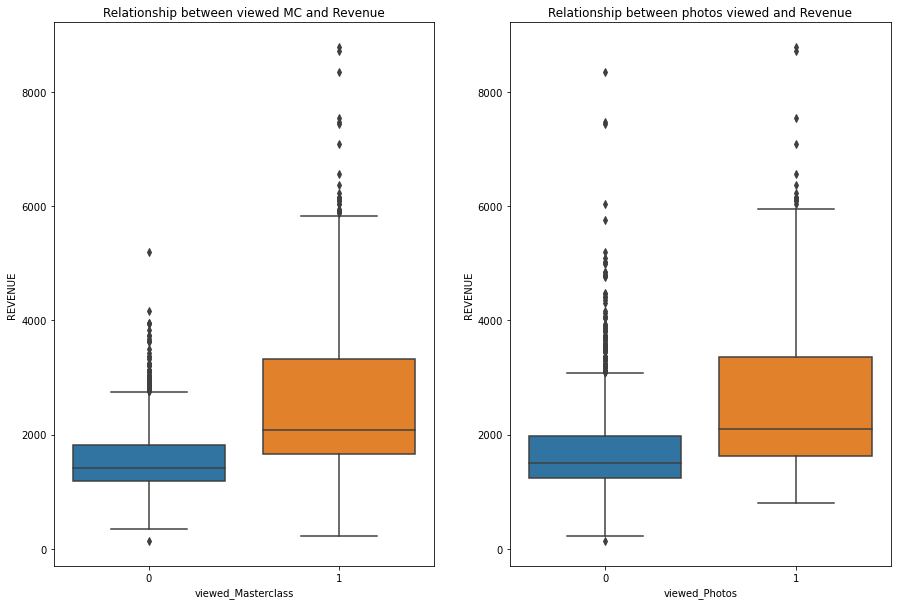


Total Views

----------
Masterclass
----------
0     932
1    1014
Name: viewed_Masterclass, dtype: int64


----------
Photos
----------
0    1140
1     806
Name: viewed_Photos, dtype: int64





In [30]:
#Relationship between content viewed and revenue

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


## mobile logins ##

# first plot window
plt.subplot(1, 2, 1)

# developing a boxplot
sns.boxplot(x     = 'viewed_Masterclass',
            y     = 'REVENUE',
            data  = df)


# titles and labels
plt.title(label   = 'Relationship between viewed MC and Revenue')
plt.xlabel(xlabel = 'viewed_Masterclass')
plt.ylabel(ylabel = 'REVENUE')



## pg logins ##

# second plot window
plt.subplot(1, 2, 2)


# developing a boxplot
sns.boxplot(x     = 'viewed_Photos',
            y     = 'REVENUE',
            data  = df)


# titles and labels
plt.title(label   = 'Relationship between photos viewed and Revenue')
plt.xlabel(xlabel = 'viewed_Photos')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout
plt.show()


# printing value counts for total logins
print(f"""
Total Views
==================

----------
Masterclass
----------
{df['viewed_Masterclass'].value_counts(normalize = False).sort_index()}


----------
Photos
----------
{df['viewed_Photos'].value_counts(normalize = False).sort_index()}


""")

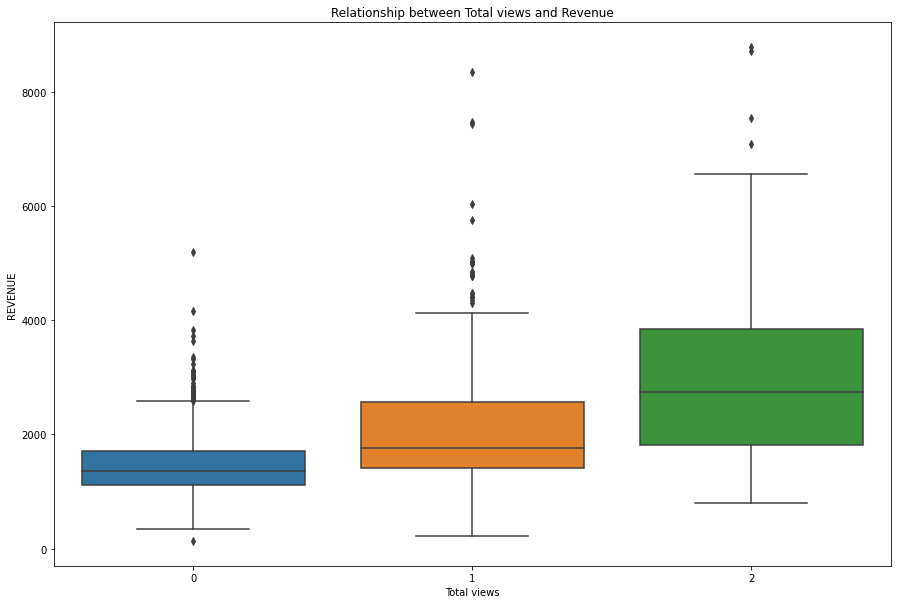


Views

-----------
Total Views
-----------
0    678
1    716
2    552
Name: TOTAL_views, dtype: int64


---------------------
Views Correlations with Revenue
---------------------
viewed_Masterclass    0.45
viewed_Photos         0.37
TOTAL_views           0.52
REVENUE               1.00
Name: REVENUE, dtype: float64




In [31]:
#Looking at the comparison of total views and revenue

'viewed_Masterclass','viewed_Photos'

df['TOTAL_views'] = df['viewed_Masterclass'] + (df['viewed_Photos'])

# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'TOTAL_views',
            y    = 'REVENUE',
            data =  df)



# titles and labels
plt.title(label   = 'Relationship between Total views and Revenue')
plt.xlabel(xlabel = 'Total views')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout
plt.show()


## the following code has been written for you ##

# developing a correlation matrix
deliver_corr = df.loc[ : , ['viewed_Masterclass',
                              'viewed_Photos',
                              'TOTAL_views',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
Views
=========

-----------
Total Views
-----------
{df['TOTAL_views'].value_counts(normalize = False).sort_index()}


---------------------
Views Correlations with Revenue
---------------------
{deliver_corr['REVENUE']}

""")

In [32]:
# Transforming independent features
df['log_AVG_TIME_PER_SITE_VISIT']     = np.log10(df['AVG_TIME_PER_SITE_VISIT'])
df['log_AVG_PREP_VID_TIME']           = np.log10(df['AVG_PREP_VID_TIME'])
df['log_UNIQUE_MEALS_PURCH']          = np.log10(df['UNIQUE_MEALS_PURCH'])
df['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(df['CONTACTS_W_CUSTOMER_SERVICE'])
df['log_PRODUCT_CATEGORIES_VIEWED']   = np.log10(df['PRODUCT_CATEGORIES_VIEWED'])
df['log_PC_LOGINS']                   = np.log10(df['PC_LOGINS'])
df['log_MEDIAN_MEAL_RATING']          = np.log10(df['MEDIAN_MEAL_RATING'])
df['log_AVG_CLICKS_PER_VISIT']        = np.log10(df['AVG_CLICKS_PER_VISIT'])


In [33]:
#checking if successfully added
df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'CLEAN_MAIL', 'personal', 'work', 'has_WEEKLY_PLAN', 'has_EARLY_DELIVERIES', 'viewed_Masterclass', 'viewed_Photos', 'TOTAL_views', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_PREP_VID_TIME', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_PRODUCT_CATEGORIES_VIEWED', 'log_PC_LOGINS', 'log_MEDIAN_MEAL_RATING', 'log_AVG_CLICKS_PER_VISIT'], dtype='object')

In [34]:
#Splitting Variables in half to increase amount of information
#Biniarizing Meal rating with rating over three 
df['trend_MEDIAN_MEAL_RATING'] = 0
df.loc[df['MEDIAN_MEAL_RATING'] > 3, 'trend_MEDIAN_MEAL_RATING'] = 1

#Splitting average clicks per visit in half
df['trend_AVG_CLICKS_PER_VISIT'] = 0
df.loc[df['AVG_CLICKS_PER_VISIT'] > 8, 'trend_AVG_CLICKS_PER_VISIT'] = 1


In [35]:
### Analyzing Pearson Correlations of the X-variables with the Y-variable 

# creating a (Pearson) correlation matrix
df_corr = df.corr().round(2)


# printing (Pearson) correlations with Revenue
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
AVG_PREP_VID_TIME                  0.64
log_AVG_PREP_VID_TIME              0.63
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
trend_MEDIAN_MEAL_RATING           0.59
log_MEDIAN_MEAL_RATING             0.55
TOTAL_views                        0.52
TOTAL_PHOTOS_VIEWED                0.47
viewed_Masterclass                 0.45
MASTER_CLASSES_ATTENDED            0.45
LARGEST_ORDER_SIZE                 0.44
viewed_Photos                      0.37
log_CONTACTS_W_CUSTOMER_SERVICE    0.17
log_AVG_TIME_PER_SITE_VISIT        0.15
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
PRODUCT_CATEGORIES_VIEWED          0.03
MOBILE_NUMBER                      0.03
PC_LOGINS                          0.02
CANCELLATIONS_BEFORE_NOON          0.01
has_EARLY_DELIVERIES               0.01
work                               0.01
log_PC_LOGINS                      0.01
TASTES_AND_PREFERENCES             0.01


In [36]:
#Building Full Model to Compare how Explanatory Variables Fare


# making a copy of df
df_explanatory = df.copy()


# dropping SalePrice and Order from the explanatory variable set
df_explanatory = df_explanatory.drop(['REVENUE',
                                          #following columns removed due to no use or
                                          #redundancy (ie: email categories and all email names)
                                          'NAME','EMAIL','FIRST_NAME','FAMILY_NAME','CLEAN_MAIL'
                
                                          
                                         ], axis = 1)


# formatting each explanatory variable for statsmodels
for val in df_explanatory:
    print(val,'+')


CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
personal +
work +
has_WEEKLY_PLAN +
has_EARLY_DELIVERIES +
viewed_Masterclass +
viewed_Photos +
TOTAL_views +
log_AVG_TIME_PER_SITE_VISIT +
log_AVG_PREP_VID_TIME +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_PC_LOGINS +
log_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
trend_MEDIAN_MEAL_RATING +
trend_AVG_CLICKS_PER_VISIT +


In [37]:
#log transforming Revenue and saving it to the dataset
df['log_REVENUE'] = np.log10(df['REVENUE'])

In [38]:
# saving feature-rich df dataset in excel
df.to_excel('df_Feature_Rich.xlsx',index = False)


Building a model

In [39]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """log_REVENUE ~  CROSS_SELL_SUCCESS +
                                TOTAL_MEALS_ORDERED +
                                MASTER_CLASSES_ATTENDED +
                                log_MEDIAN_MEAL_RATING +
                                TOTAL_PHOTOS_VIEWED +
                                PRODUCT_CATEGORIES_VIEWED +
                                log_AVG_TIME_PER_SITE_VISIT +
                                AVG_PREP_VID_TIME +
                                log_UNIQUE_MEALS_PURCH +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                log_PC_LOGINS +
                                log_AVG_CLICKS_PER_VISIT+
                                trend_AVG_CLICKS_PER_VISIT+
                                MOBILE_NUMBER +
                                TASTES_AND_PREFERENCES +
                                MOBILE_LOGINS +
                                EARLY_DELIVERIES+ 
                                LATE_DELIVERIES +
                                PACKAGE_LOCKER +
                                REFRIGERATED_LOCKER +
                                LARGEST_ORDER_SIZE +
                                has_EARLY_DELIVERIES +
                                work+
                                personal+
                                trend_MEDIAN_MEAL_RATING +
                                TOTAL_views
""",
                  
                  
                               data = df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     181.4
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        23:35:37   Log-Likelihood:                 1439.4
No. Observations:                1946   AIC:                            -2827.
Df Residuals:                    1920   BIC:                            -2682.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.0305      0.065     31.405      0.000       1.904       2.157
CROSS_SELL_SUCCESS             -0.0088      0.006     -1.517      0.129      -0.020       0.003
TOTAL_MEALS_ORDERED             0.0010   5.99e-05     16.805      0.000       0.001       0.001
MASTER_CLASSES_ATTENDED         0.0099      0.007      1.462      0.144      -0.003       0.023
log_MEDIAN_MEAL_RATING          0.2942      0.032      9.092      0.000       0.231       0.358
TOTAL_PHOTOS_VIEWED         -1.131e-05   2.07e-05     -0.546      0.585    -5.2e-05    2.93e-05
PRODUCT_CATEGORIES_VIEWED       0.0013      0.001      1.532      0.126      -0.000       0.003
log_AVG_TIME_PER_SITE_VISIT    -0.0379      0.014     -2.787      0.005      -0.065      -0.011
AVG_PREP_VID_TIME               0.0019      0.000     17.354      0.000       0.002       0.002
log_UNIQUE_MEALS_PURCH         -0.1619      0.010    -15.734      0.000      -0.182      -0.142
CONTACTS_W_CUSTOMER_SERVICE    -0.0050      0.001     -4.060      0.000      -0.007      -0.003
log_PC_LOGINS                  -0.0217      0.057     -0.380      0.704      -0.134       0.091
log_AVG_CLICKS_PER_VISIT       -0.0676      0.065     -1.033      0.302      -0.196       0.061
trend_AVG_CLICKS_PER_VISIT      0.0754      0.023      3.273      0.001       0.030       0.121
MOBILE_NUMBER                   0.0109      0.008      1.340      0.180      -0.005       0.027
TASTES_AND_PREFERENCES          0.0083      0.006      1.417      0.157      -0.003       0.020
MOBILE_LOGINS                  -0.0053      0.005     -1.042      0.298      -0.015       0.005
EARLY_DELIVERIES               -0.0008      0.002     -0.449      0.653      -0.004       0.003
LATE_DELIVERIES                -0.0004      0.001     -0.428      0.669      -0.002       0.001
PACKAGE_LOCKER                 -0.0080      0.006     -1.267      0.205      -0.020       0.004
REFRIGERATED_LOCKER            -0.0054      0.010     -0.566      0.571      -0.024       0.013
LARGEST_ORDER_SIZE             -0.0197      0.003     -6.725      0.000      -0.025      -0.014
has_EARLY_DELIVERIES            0.0012      0.009      0.136      0.892      -0.016       0.018
work                            1.0167      0.032     31.434      0.000       0.953       1.080
personal                        1.0138      0.033     31.152      0.000       0.950       1.078
trend_MEDIAN_MEAL_RATING        0.0956      0.011      8.482      0.000       0.073       0.118
TOTAL_views                     0.0390      0.006      6.095      0.000       0.026       0.052
==============================================================================
Omnibus:                      274.078   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarqu

Building Training and Testing Data Sets


In [40]:
#Using New Feature Rich Dataset


# importing libraries
import pandas as pd  # data science essentials
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # enhanced data visualization
import statsmodels.formula.api as smf  # regression modeling
import sklearn.linear_model  #lasso regression
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './df_Feature_Rich.xlsx'

# reading the file into Python
dfft = pd.read_excel(file)

# checking the file
dfft.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,CLEAN_MAIL,personal,work,has_WEEKLY_PLAN,has_EARLY_DELIVERIES,viewed_Masterclass,viewed_Photos,TOTAL_views,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,log_PRODUCT_CATEGORIES_VIEWED,log_PC_LOGINS,log_MEDIAN_MEAL_RATING,log_AVG_CLICKS_PER_VISIT,trend_MEDIAN_MEAL_RATING,trend_AVG_CLICKS_PER_VISIT,log_REVENUE
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth,0,1,0,0,0,0,0,1.681241,1.523746,0.778151,1.079181,1.00000,0.698970,0.000000,1.230449,0,1,2.594393
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge,0,1,1,0,0,1,1,1.605844,1.928396,0.477121,0.903090,0.90309,0.698970,0.477121,1.113943,0,1,3.135133
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj,0,1,1,0,0,0,0,1.296007,1.799341,0.845098,1.041393,0.69897,0.778151,0.301030,1.204120,0,1,2.903090
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge,0,1,1,0,0,0,0,1.954243,1.641474,0.778151,1.041393,0.69897,0.778151,0.301030,1.146128,0,1,2.778151
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj,0,1,1,0,1,1,2,1.606166,1.928396,0.903090,0.778151,1.00000,0.698970,0.477121,1.079181,0,1,3.173186


In [41]:
# preparing explanatory variable data
dfft_data  = dfft.drop(['REVENUE',
                            'log_REVENUE',
                            'NAME', 'EMAIL', 'FIRST_NAME',
                            'FAMILY_NAME','CLEAN_MAIL'],
                                axis = 1)


# preparing response variable data
dfft_target = dfft.loc[ : , 'REVENUE']
log_dfft_target = dfft.loc[ : , 'log_REVENUE'] # ready for use later


# preparing training and testing sets (all letters are lowercase)
# using the log revenue as our target instead

x_train, x_test, y_train, y_test = train_test_split(
            dfft_data,
            log_dfft_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")



Training Data
-------------
X-side: (1459, 40)
y-side: (1459,)


Testing Data
------------
X-side: (487, 40)
y-side: (487,)



In [42]:
# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED','MASTER_CLASSES_ATTENDED',
               'log_MEDIAN_MEAL_RATING','TOTAL_PHOTOS_VIEWED','work','personal'
               ,'PRODUCT_CATEGORIES_VIEWED',
               'log_AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME',
               'log_UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
               'trend_AVG_CLICKS_PER_VISIT','TOTAL_views',
               'log_PC_LOGINS','trend_MEDIAN_MEAL_RATING',
               'log_AVG_CLICKS_PER_VISIT','MOBILE_NUMBER',
               'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS','EARLY_DELIVERIES','LATE_DELIVERIES',
              'PACKAGE_LOCKER','REFRIGERATED_LOCKER','LARGEST_ORDER_SIZE','has_EARLY_DELIVERIES']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
MASTER_CLASSES_ATTENDED +
log_MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
work +
personal +
PRODUCT_CATEGORIES_VIEWED +
log_AVG_TIME_PER_SITE_VISIT +
AVG_PREP_VID_TIME +
log_UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
trend_AVG_CLICKS_PER_VISIT +
TOTAL_views +
log_PC_LOGINS +
trend_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
MOBILE_NUMBER +
TASTES_AND_PREFERENCES +
MOBILE_LOGINS +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
LARGEST_ORDER_SIZE +
has_EARLY_DELIVERIES +


In [43]:
# applying OLS model in scikit-learn

# preparing x-variables from the OLS model
ols_data = dfft[x_variables]

# preparing response variable
log_dfft_target = dfft['log_REVENUE']


## setting up more than one train-test split 


# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            dfft_data,     # x-variables
            log_dfft_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_dfft_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [44]:
# OLS MODEL WITH FULL DATA           

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data to model object
lr_fit = lr.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_FULL)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_FULL, y_train_FULL).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_FULL, y_test_FULL).round(4)) # using R-square

#initiating values 
lr_train_score = lr.score(x_train_FULL, y_train_FULL).round(4)
lr_test_score = lr.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7547
OLS Testing Score  : 0.7448
OLS Train-Test Gap : 0.0099


In [45]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)


OLS Training Score : 0.7009
OLS Testing Score  : 0.7016
OLS Train-Test Gap : 0.0007


In [46]:
# zipping each feature name to its coefficient
lr_model_values = zip(dfft_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    
    

In [47]:
# printing result of ols

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
\033[1mOLS        {lr_train_score}            {lr_test_score}\033[0m
""")



Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7009            0.7016



End of code